# [CoE202] **[Homework1b]** Polynomial regression 

In this section, you are going to implement polynomial regression algorithms using closed form solution.

### 0. Importing packages

For this assignment we need Numpy and Matplotlib.

In [1]:
# this is just an annotation
import numpy as np # this is for importing numpy library (and we will use abbreviation np for that)
import matplotlib.pyplot as plt # this is for importing matplotlib.pyplot (library for graph plot)

### 1. Introduction 
Given data points (x, y), we want to find non-linear estimator that fits well on the data. We are going to consider the only case when x and y are single dimension.

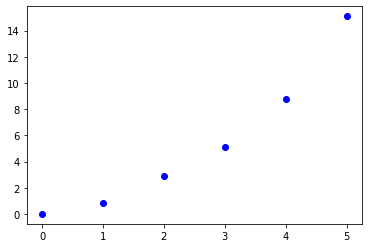

In [2]:
# data points
X = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
y = np.array([0.0, 0.8, 2.9, 5.1, 8.8, 15.1])

# plot data
plt.plot(X, y, 'bo')

### 2. Polynomial regression with closed solution

One class of functions that is covered by linear regression is the family of polynomials because we can write a polynomial of degree $K$ as
$$
\sum_{k=0}^K \theta_k x^k = \boldsymbol \phi(x)^T\boldsymbol\theta\,,\quad
\boldsymbol\phi(x)= 
\begin{bmatrix}
x^0\\
x^1\\
\vdots\\
x^K
\end{bmatrix}\in\mathbb{R}^{K+1}\,.
$$
Here, $\boldsymbol\phi(x)$ is a nonlinear feature transformation of the inputs $x\in\mathbb{R}$.

Similar to the earlier case we can define a matrix that collects all the feature transformations of the training inputs:
$$
\boldsymbol\Phi = \begin{bmatrix}
\boldsymbol\phi(x_1) & \boldsymbol\phi(x_2) & \cdots & \boldsymbol\phi(x_n)
\end{bmatrix}^T \in\mathbb{R}^{N\times K+1}
$$
For the above data, $K=2$ (quadratic estimator) seems to be good approximation.

In [3]:
def poly_features(X, K):
    """Compute the feature matrix Phi

    Arguments:
      X: input data of size N vector
      K: degree of the polynomial
    
    Returns:
      Phi: feature matrix of size N x (K + 1)
    """
    # [Problem 1] returns feature matrix Phi from input and degree of the polynomial
    # HINT: np.vander to generate a Vandermonde matrix.
    Phi = np.vander(X, K+1, increasing=True)

    return Phi

def vectorize_y(y):
    y_vec = y.reshape(-1, 1)
    return y_vec

In [4]:
K = 2
Phi = poly_features(X, K)
y_vec = vectorize_y(y)

print(Phi)
print(y_vec)

[[ 1.  0.  0.]
 [ 1.  1.  1.]
 [ 1.  2.  4.]
 [ 1.  3.  9.]
 [ 1.  4. 16.]
 [ 1.  5. 25.]]
[[ 0. ]
 [ 0.8]
 [ 2.9]
 [ 5.1]
 [ 8.8]
 [15.1]]


  With this feature matrix we get the theta as
  $$
  \boldsymbol \theta = (\boldsymbol\Phi^T\boldsymbol\Phi)^{-1}\boldsymbol\Phi^T\boldsymbol y
  $$

In [5]:
# memo: np.dot is somewhat confusing. Let's use matmul or @ 
def np_polynomial_regression(Phi, y):
    """Compute the coefficients by closed form polynomial fitting.

    Arguments:
      Phi: feature matrix of size N x (K + 1)
      y: training targets of size N x 1
    
    Returns:
      theta_ml: coefficients of the polynomial function.
    """
    # [Problem 2] Make function that returns theta from Phi and y.
    theta = np.linalg.inv(Phi.T @ Phi) @ Phi.T @ y
    
    return theta

### 3. Testing algorithms.

[[ 0.20357143]
 [-0.12107143]
 [ 0.60535714]]


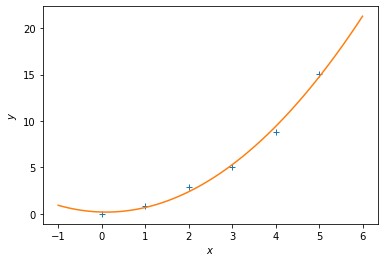

In [6]:
# get coefficients 
theta_ml = np_polynomial_regression(Phi, y_vec)
print(theta_ml)

# test inputs
Xtest = np.linspace(-1,6,100)

# feature matrix for test inputs
Phi_test = poly_features(Xtest, K)

y_pred = Phi_test @ theta_ml # predicted y-values

plt.figure()
plt.plot(X, y, '+')
plt.plot(Xtest, y_pred)
plt.xlabel("$x$")
plt.ylabel("$y$");